# # Box Office Mojo WebScraping/Analysis

In [2]:
#Start Webscraping

In [2]:
import pandas as pd
import requests
page = requests.get('https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')
page2 = requests.get('https://www.boxofficemojo.com/year/2019/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')


In [3]:
page2.status_code

200

In [4]:
from bs4 import BeautifulSoup as BS
url = "https://www.boxofficemojo.com/year/2018/?sort=gross&ref_=bo_yld__resort#table"
page=requests.get(url)
soup = BS(page.content, 'html.parser')
url2 = "https://www.boxofficemojo.com/year/2019/?sort=gross&ref_=bo_yld__resort#table"
page2=requests.get(url2)
soup2 = BS(page2.content, 'html.parser')

In [5]:
#Making lists from the scraped Data

In [6]:
titles = soup.find_all(class_='a-text-left mojo-field-type-release mojo-cell-wide')
titles2 = soup2.find_all(class_='a-text-left mojo-field-type-release mojo-cell-wide')
all_titles = []
for title in titles:
    all_titles.append(title.select('a')[0].string)
all_titles_2 = []
for title in titles2:
    all_titles_2.append(title.select('a')[0].string)


In [7]:
gross = soup.find_all(class_='a-text-right mojo-field-type-money mojo-estimatable')
gross_2 = soup2.find_all(class_='a-text-right mojo-field-type-money mojo-estimatable')
gross_list = []
for i in gross:
    gross_list.append(i.string)
gross_list2 = []
for i in gross_2:
    gross_list2.append(i.string)

In [8]:
theaters = soup.find_all(class_='a-text-right mojo-field-type-positive_integer')
theaters2 = soup2.find_all(class_='a-text-right mojo-field-type-positive_integer')
theater_list = []
for i in theaters:
    theater_list.append(i.string)
theater_list2 = []
for i in theaters2:
    theater_list2.append(i.string)

In [9]:
release_date = soup.find_all(class_ = 'a-text-left mojo-field-type-date a-nowrap')
release_date2 = soup2.find_all(class_ = 'a-text-left mojo-field-type-date a-nowrap')
release_date_list = []
for i in release_date:
    release_date_list.append(i.string)
release_date_list2 = []
for i in release_date2:
    release_date_list2.append(i.string)

In [10]:
distributor = soup.find_all(class_ = 'a-text-left mojo-field-type-studio')
distributor2 = soup2.find_all(class_ = 'a-text-left mojo-field-type-studio')
distributor_list = []
for i in distributor:
    distributor_list.append(i.get_text())
distributor_list2 = []
for i in distributor2:
    distributor_list2.append(i.get_text())

In [11]:
#create the dataFrame 

In [12]:
import numpy as np
movies_2018 = pd.DataFrame(list(zip(all_titles, gross_list, theater_list, release_date_list, distributor_list)),
                           columns =['Movie_Title','Gross_Revenue', 'Amount_of_Theaters', 'Realease_Date', 'Distributor'],)
movies_2019 = pd.DataFrame(list(zip(all_titles_2, gross_list2, theater_list2, release_date_list2, distributor_list2)),
                           columns =['Movie_Title','Gross_Revenue', 'Amount_of_Theaters', 'Realease_Date', 'Distributor'],)

In [14]:
#set the index

In [15]:
movies_2018.set_index('Movie_Title', inplace = True)
movies_2019.set_index('Movie_Title', inplace = True)

In [16]:
#No nulls. No duplicates. Moving on to changing datatypes for gross revenue, amount of theaters, and release date.

In [17]:
movies_2018['Gross_Revenue'] = movies_2018['Gross_Revenue'].str.replace(r'$', '')
movies_2018['Gross_Revenue'] = movies_2018['Gross_Revenue'].str.replace(r',', '')
movies_2019['Gross_Revenue'] = movies_2019['Gross_Revenue'].str.replace(r'$', '')
movies_2019['Gross_Revenue'] = movies_2019['Gross_Revenue'].str.replace(r',', '')

In [19]:
movies_2018['Amount_of_Theaters'] = movies_2018['Amount_of_Theaters'].str.replace(r',', '')
movies_2019['Amount_of_Theaters'] = movies_2019['Amount_of_Theaters'].str.replace(r',', '')
movies_2018['Distributor'] = movies_2018['Distributor'].str.rstrip('\n\n')
movies_2019['Distributor'] = movies_2019['Distributor'].str.rstrip('\n\n')

In [20]:
movies_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Avengers: Endgame to Faustina: Love and Mercy
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gross_Revenue       200 non-null    object
 1   Amount_of_Theaters  200 non-null    object
 2   Realease_Date       200 non-null    object
 3   Distributor         200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB


In [21]:
#convert to integers

In [22]:
movies_2018['Gross_Revenue'] = pd.to_numeric(movies_2018['Gross_Revenue'])
movies_2019['Gross_Revenue'] = pd.to_numeric(movies_2019['Gross_Revenue'])
movies_2018['Amount_of_Theaters'] = pd.to_numeric(movies_2018['Amount_of_Theaters'])
movies_2019['Amount_of_Theaters'] = pd.to_numeric(movies_2019['Amount_of_Theaters'])
movies_2018['Realease_Date'] = movies_2018.Realease_Date.astype(str)
movies_2019['Realease_Date'] = movies_2019.Realease_Date.astype(str)


In [23]:
movies_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Avengers: Endgame to Faustina: Love and Mercy
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gross_Revenue       200 non-null    int64 
 1   Amount_of_Theaters  200 non-null    int64 
 2   Realease_Date       200 non-null    object
 3   Distributor         200 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [24]:
movies_2018['Realease_Date'] = movies_2018.Realease_Date.astype(str)
movies_2019['Realease_Date'] = movies_2019.Realease_Date.astype(str)

In [25]:
#convert months to abbreviations

In [26]:
movies_2018['Realease_Date'] = movies_2018['Realease_Date'].map(lambda x: str(x)[0:3])
movies_2019['Realease_Date'] = movies_2019['Realease_Date'].map(lambda x: str(x)[0:3])

In [27]:
#count of the top grossing movies by month

In [28]:
top_grossing_2018 = movies_2018['Realease_Date'].value_counts()
top_grossing_2019 = movies_2019['Realease_Date'].value_counts()

In [29]:
movies_2018['Year']= 2018
movies_2019['Year']= 2019

In [30]:
#concat the DataFrames

In [31]:
df = pd.concat([movies_2018,movies_2019])

In [32]:
#We have the most Top Grossing Movies in December and November. The problem now is we have to see if that is
#because they released the most movies during that time frame or were they on par for the same amount of realeases
#as the other months

In [33]:
#Time to scrape some more data to get the total releases per month for calendar years 2018 and 2019

In [34]:
page3 = requests.get('https://www.boxofficemojo.com/month/by-year/2018/?grossesOption=calendarGrosses')
page3.status_code

200

In [35]:
url3 = "https://www.boxofficemojo.com/month/by-year/2018/?grossesOption=calendarGrosses"
page3=requests.get(url3)
soup3 = BS(page3.content, 'html.parser')
url4 = "https://www.boxofficemojo.com/month/by-year/2019/?grossesOption=calendarGrosses"
page4=requests.get(url4)
soup4 = BS(page4.content, 'html.parser')

In [36]:
months = soup3.find_all(class_='a-text-left mojo-header-column mojo-truncate mojo-field-type-named_interval mojo-sort-column')

In [37]:
month_list_2018 = []
for i in months:
    month_list_2018.append(i.get_text())

In [38]:
amount_of_realeases = soup3.find_all(class_='a-text-right mojo-field-type-positive_integer')
amount_of_realeases2 = soup4.find_all(class_='a-text-right mojo-field-type-positive_integer')
#the second one is for 2019, the first is 2018

In [39]:
amount_of_realeases_2018 =[]
for i in amount_of_realeases:
    amount_of_realeases_2018.append(i.get_text())
amount_of_realeases_2019 =[]
for i in amount_of_realeases2:
    amount_of_realeases_2019.append(i.get_text())


In [40]:
#New DataFrame with the info

In [41]:
number_of_releases = pd.DataFrame(list(zip(month_list_2018, amount_of_realeases_2018, amount_of_realeases_2019,)),
                           columns =['Months','Releases_in_2018', 'Releases_in_2019', ])
topGrossingValues = pd.DataFrame(list(zip(top_grossing_2018, top_grossing_2019)),
                           columns =['Releases_in_2018', 'Releases_in_2019', ])


In [42]:
topGrossingValues2019 = pd.DataFrame(top_grossing_2019)
topGrossingValues2018= pd.DataFrame(top_grossing_2018)
topGrossingValues2018.reset_index(inplace =True)
topGrossingValues2019.reset_index(inplace = True)
topGrossingValues2018.rename(columns ={'index':'Months'}, inplace = True)
topGrossingValues2019.rename(columns ={'index':'Months'}, inplace = True)
tgv18_19 = topGrossingValues2018.merge(topGrossingValues2019, on = 'Months',)

In [43]:
#merge with the previously scraped DataFrame so that we're only working on one

In [45]:
number_of_releases['Months']=number_of_releases['Months'].map(lambda x: str(x)[0:3])
releases = number_of_releases.merge(tgv18_19,on ='Months')
releases['Releases_in_2018'] = releases['Releases_in_2018'].astype(int)
releases['Releases_in_2019'] = releases['Releases_in_2019'].astype(int)
releases['sum_of_releases'] = releases['Releases_in_2018'] +releases['Releases_in_2019']
releases['sum_of_top_grossing'] = releases['Realease_Date_x'] + releases['Realease_Date_y']
releases['percent_of_top_grossing_movies_released'] = round((releases['sum_of_top_grossing']/releases['sum_of_releases'])*100,2)
releases = releases.sort_index(ascending = False)

In [1]:
#Create Graph

Text(0.5, 1.0, 'Chance that an individual movie will reach top 200 status for that year')

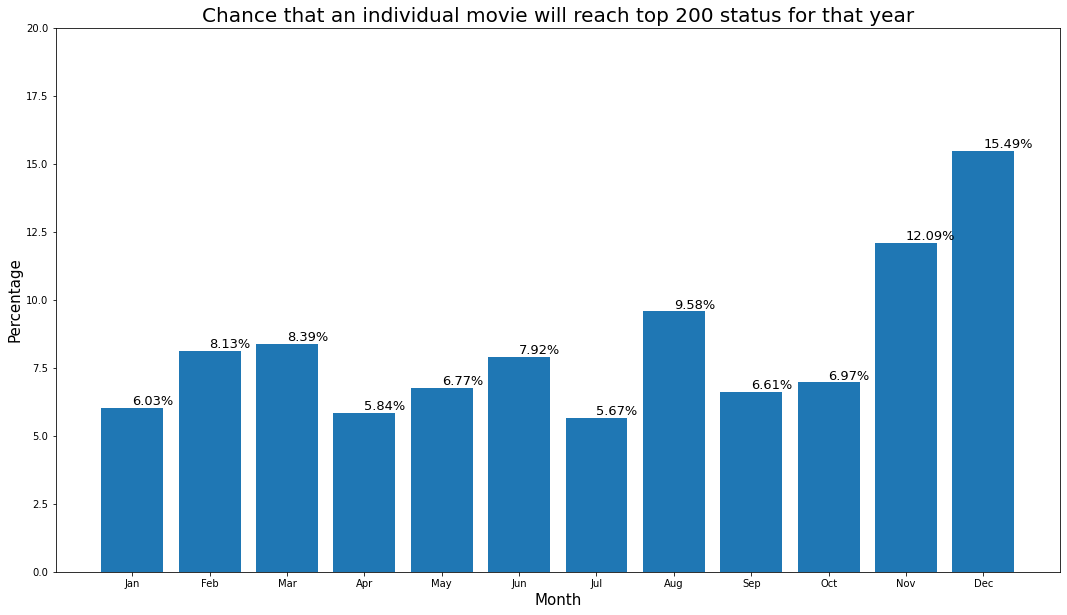

In [53]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(18,10))
ax.bar(releases['Months'],height = releases['percent_of_top_grossing_movies_released'])
ax.set_ylim(0,20)
for index,data in enumerate(releases['percent_of_top_grossing_movies_released']):
    plt.text(x=index , y =data+.1 , s=f"{data}"+'%' , fontdict=dict(fontsize=13))
ax.set_xlabel('Month', size = 15)
ax.set_ylabel('Percentage', size =15)
ax.set_title('Chance that an individual movie will reach top 200 status for that year', size =20)